In [103]:
# To read all the Sales data

import pandas as pd
import os

files = [file for file in os.listdir(r"C:\Users\MOHANRAJ\Desktop\Projects\Sales_Insight\Sales_month")]

Months = pd.DataFrame()
for data in files:
    df=pd.read_csv('C:/Users/MOHANRAJ/Desktop/Projects/Sales_Insight/Sales_month/'+data)
    all_data = pd.concat([Months,df])
all_data.to_csv("All_Data.csv",index=False)

SalesData = pd.read_csv("All_Data.csv")
SalesData.head()
 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [104]:
# Cleaning the data before the Analysis

# Droping All NaN Values
DF_SalesData = SalesData.dropna()
DF_SalesData.shape

(11646, 6)

In [105]:
# Creating A new Column called Month

DF_SalesData["Month"] = DF_SalesData["Order Date"].apply(lambda x:x[:2])
DF_SalesData=DF_SalesData[DF_SalesData["Month"] != "Or"]
DF_SalesData["Month"]=DF_SalesData["Month"].astype("int32")
DF_SalesData.head()

C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_15796\505717801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_SalesData["Month"] = DF_SalesData["Order Date"].apply(lambda x:x[:2])
C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_15796\505717801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_SalesData["Month"]=DF_SalesData["Month"].astype("int32")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9


In [106]:
# Creating A new Column called Sales
# Sales = Quantity * price

DF_SalesData["Quantity Ordered"]=pd.to_numeric(DF_SalesData["Quantity Ordered"])
DF_SalesData["Price Each"]=pd.to_numeric(DF_SalesData["Price Each"])

DF_SalesData["Sales"]= (DF_SalesData["Quantity Ordered"] * DF_SalesData["Price Each"])

DF_SalesData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


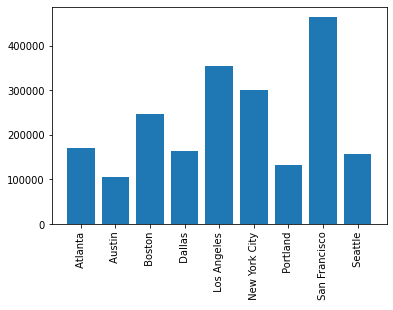

In [107]:
# 1. which city had the the highest nmber of sales

# Creating a new Column Called City
DF_SalesData["City"] = DF_SalesData["Purchase Address"].apply(lambda x:x.split(",")[1])

result1= DF_SalesData.groupby("City").sum()
result1.reset_index(inplace=True)

# Visulaization
plt.bar(result1["City"],result1["Sales"])
plt.xticks(result1["City"],rotation="vertical",size=10)
plt.show()

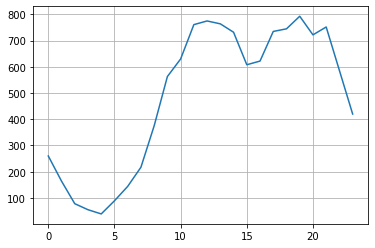

In [108]:
# 2. what time should we adverst to maximize likellood of customer buying product

# Creating 3 new column from the Order Date

# Time
DF_SalesData["Time"] = pd.to_datetime(DF_SalesData["Order Date"])
# Hours
DF_SalesData["Hours"] = DF_SalesData["Time"].dt.hour
# Minutes
DF_SalesData["Minutes"]= DF_SalesData["Time"].dt.hour

result2 = DF_SalesData.groupby("Hours").count()
result2.reset_index(inplace=True)

# Visulaization
plt.plot(result2["Hours"],result2["Time"])
plt.grid()
plt.show()

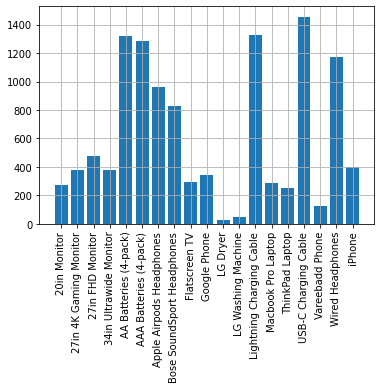

In [109]:
# 3. Which Product Sold Highist

result3=DF_SalesData.groupby("Product").count()
result3.reset_index(inplace=True)

plt.bar(result3["Product"],result3["Sales"])
plt.xticks(result3["Product"],rotation="vertical",size=10)
plt.grid()
plt.show()

C:\Users\MOHANRAJ\AppData\Local\Temp\ipykernel_15796\3502705605.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(result3["Product"],rotation = "vertical",size=10)


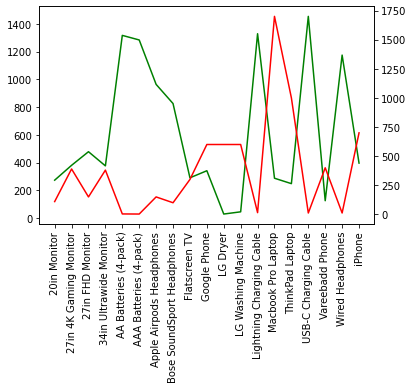

In [110]:
# 4. Products Sold Occording to their price

Price = DF_SalesData.groupby("Product").mean()["Price Each"]
fig,ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.plot(result3["Product"],result3["Sales"],"g-")
ax2.plot(result3["Product"],Price,"r-")
ax1.set_xticklabels(result3["Product"],rotation = "vertical",size=10)
plt.show()


In [111]:
# 5. what product are most often sold together

# for insight We can see which order Id ordered Which Product
DF_SalesData=DF_SalesData[DF_SalesData["Order ID"].duplicated(keep=False)]
DF_SalesData["Products"]=DF_SalesData.groupby("Order ID")["Product"].transform(lambda x:",".join(x))
DF_SalesData=DF_SalesData[["Products","Order ID"]].drop_duplicates()
DF_SalesData.head(5)

,Products,Order ID
20,"USB-C Charging Cable,USB-C Charging Cable",248171
60,"iPhone,Lightning Charging Cable",248210
70,"Bose SoundSport Headphones,Google Phone",248219
117,"Vareebadd Phone,Bose SoundSport Headphones",248265
176,"Google Phone,Bose SoundSport Headphones",248323


In [112]:
# 6. What are the commonly bought product

from itertools import combinations
from collections import Counter

count=Counter()
for i in DF_SalesData["Products"]:
    row=i.split(",")
    count.update(Counter(combinations(row,2)))
count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 61),
 (('Google Phone', 'USB-C Charging Cable'), 60),
 (('iPhone', 'Wired Headphones'), 27),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 22),
 (('iPhone', 'Apple Airpods Headphones'), 18),
 (('Google Phone', 'Wired Headphones'), 17),
 (('Google Phone', 'Bose SoundSport Headphones'), 11),
 (('Lightning Charging Cable', 'Wired Headphones'), 8),
 (('Vareebadd Phone', 'Wired Headphones'), 6),
 (('USB-C Charging Cable', 'Wired Headphones'), 6)]